In [34]:
import pandas as pd
from scipy import stats
import env
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import acquire as acq
import prepare as prep
import warnings
warnings.filterwarnings("ignore")

4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [91]:
df_iris_py = data('iris')

In [92]:
df_iris = sns.load_dataset('iris')

#def new_iris_data(SQL_query, url):
    '''
    this function will:
    - take in a SQL_query 
    -create a connection url to mySQL
    -return a df of the given query from iris
    
    '''
    url= f'mysql+pymysql://{env.username}:{env.password}@{env.host}/iris_db'
    return pd.read_sql(SQL_query,url)

SQL_query = '''select * from species'''
filename = "iris.csv"
directory = '/Users/esayasa./codeup-data-science/statistics-exercises/'
url= f'mysql+pymysql://{env.username}:{env.password}@{env.host}/iris_db'

def get_iris_data(SQL_query, directory, url, filename = "iris.csv"):
    '''
    this function will:
    -check local directory for csv file
        return if exists
    if csv doesn't exist
    if csv doesnt exist:
        - create a df of the SQL_query
        write df to csv
    output titanic df
    
    '''
    if os.path.exists(directory + 'iris_db'):
        df = pd.read_csv(filename)
        return df
    else:
        df= new_iris_data(SQL_query, url)
        df.to_csv(filename)
        return df  

In [93]:
df.head()

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [94]:
df_iris.shape

(150, 5)

In [95]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [97]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [99]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


5. Read the data from this google sheet into a dataframe, df_google.

In [35]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [36]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

In [37]:
df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df_googlesheet.shape

(891, 12)

In [101]:
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
df_googlesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
df_googlesheet.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [104]:
df_googlesheet.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [108]:
df_googlesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Solution: Other way to do this is:

for col in df_google.columns.to_list():
    if df_google[col].dtype == 'object':
        print(f"{col} has {df_google[col].nunique()} unique values.")

In [109]:
df_googlesheet.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [110]:
df_googlesheet.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

6. Download Exercise 5's Google Sheet into an XLSX (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [111]:
df_excel = pd.read_excel("train.xlsx", sheet_name="train", header=0)

In [112]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [114]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
df_excel.shape[0]

891

In [119]:
df_excel.shape[1]

12

In [120]:
df_excel.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

6. 4 print the column names that have a data type of object

In [121]:
df_excel.select_dtypes(include='object').columns.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [122]:
df_excel.select_dtypes('object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [123]:
df_excel.select_dtypes(exclude='object').columns.to_list()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [124]:
df_excel.select_dtypes(exclude='object').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


6.5 compute the range for each of the numeric variables.

In [125]:
df_excel.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df_excel[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [128]:
titanic_stats = df_excel[['Age', 'Fare']].describe().T

In [129]:
titanic_stats

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [130]:
titanic_stats['max'] - titanic_stats['min']

Age      79.5800
Fare    512.3292
dtype: float64

In [131]:
titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min']

In [132]:
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


A1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [4]:
def get_connection_url(db, username=env.username, host=env.host, password=env.password):
    """
    This function will:
    - take username, pswd, host credentials from imported env module
    - output a formatted connection_url to access mySQL db
    """
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [164]:
def new_titanic_data(SQL_query):
    """
    This function will:
    - take in a SQL_query
    - create a connection_url to mySQL
    - return a df of the given query from the titanic_db
    """
    url = get_connection_url('titanic_db')
    
    return pd.read_sql(SQL_query, url)

In [154]:
def get_titanic_data(SQL_query, directory, filename = 'titanic.csv'):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - if csv doesn't exist:
        - creates df of sql query
        - writes df to csv
    - outputs titanic df
    """
    if os.path.exists(directory+filename): 
        df = pd.read_csv(filename)
        return df
    else:
        df = new_titanic_data(SQL_query)

        df.to_csv(filename)
        return df


In [136]:
titanic_query = "select * from passengers"
directory = os.getcwd()

In [137]:
titanic_df = get_titanic_data(titanic_query, directory)

In [138]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


A2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [18]:
def new_iris_data(SQL_query):
    """
    This function will:
    - take in a SQL_query
    - create a connection_url to mySQL
    - return a df of the given query from the iris_db
    """
    url = get_connection_url('iris_db')
    
    return pd.read_sql(SQL_query, url)

In [19]:
def get_iris_data(SQL_query, directory, filename = 'iris.csv'):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - if csv doesn't exist:
        - creates df of sql query
        - writes df to csv
    - outputs iris df
    """
    if os.path.exists(directory+filename): 
        df = pd.read_csv(filename)
        return df
    else:
        df = new_iris_data(SQL_query)

        df.to_csv(filename)
        return df

In [20]:
iris_query = """
            SELECT 
                species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
            FROM measurements
            JOIN species USING(species_id)            
"""

iris_df = get_iris_data(iris_query, acq.directory)
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [21]:
def new_telco_data(SQL_query):
    """
    This function will:
    - take in a SQL_query
    - create a connection_url to mySQL
    - return a df of the given query from the telco_db
    """
    url = get_connection_url('telco_churn')
    
    return pd.read_sql(SQL_query, url)

In [25]:
def get_telco_data(SQL_query, directory, filename = 'telco.csv'):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - if csv doesn't exist:
        - creates df of sql query
        - writes df to csv
    - outputs telco df
    """
    if os.path.exists(directory+filename): 
        df = pd.read_csv(filename)
        return df
    else:
        df = new_telco_data(SQL_query)

        df.to_csv(filename)
        return df

In [27]:
telco_df = get_telco_data(telco_query, acq.directory)

telco_query = """
        select * from customers
        join contract_types using (contract_type_id)
        join internet_service_types using (internet_service_type_id)
        join payment_types using (payment_type_id)
        """

telco_df.head()


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [9]:
import acquire as acq

In [3]:
acq.iris_query

'\n            SELECT \n                species_id,\n                species_name,\n                sepal_length,\n                sepal_width,\n                petal_length,\n                petal_width\n            FROM measurements\n            JOIN species USING(species_id)           \n'

In [4]:
acq.get_iris_data(acq.iris_query, acq.directory)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


## Exploratory Analysis

2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

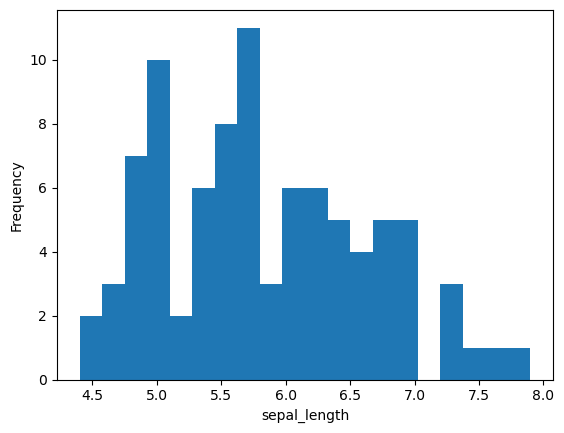

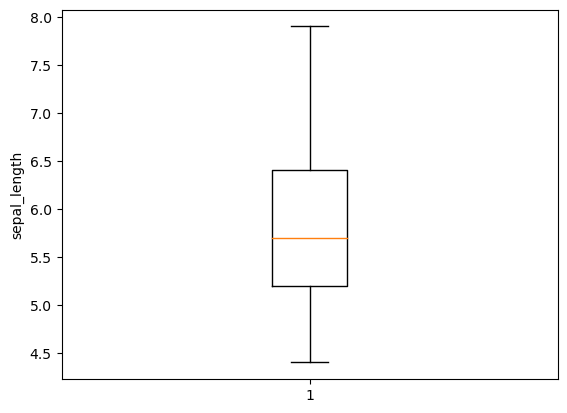

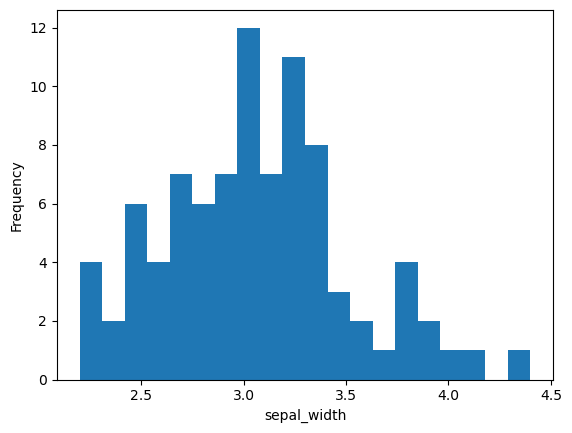

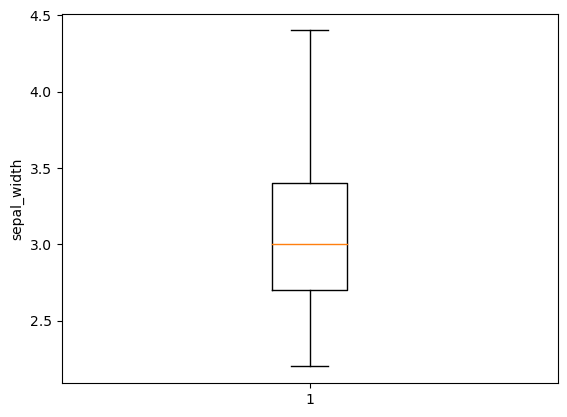

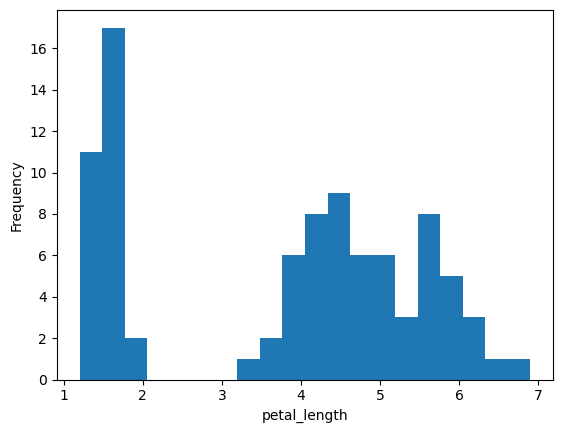

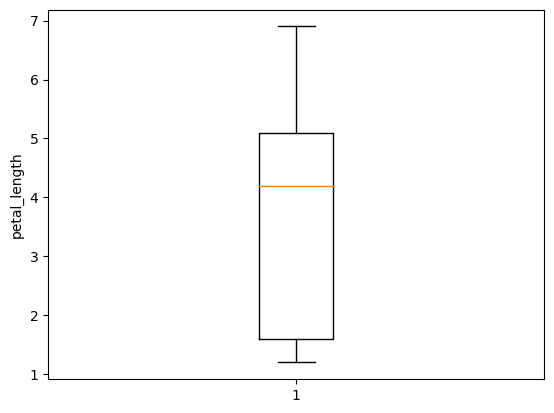

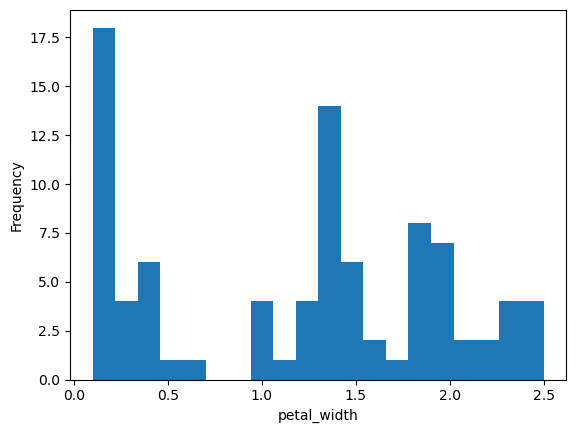

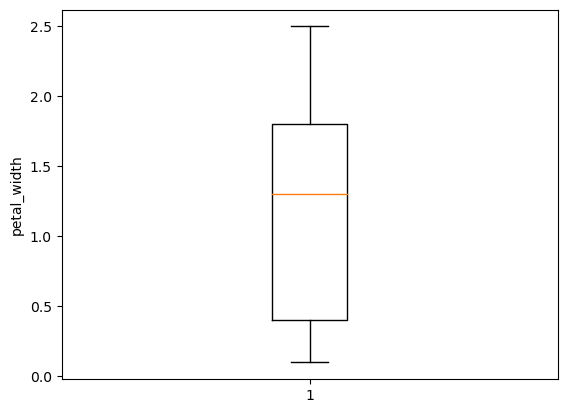

In [31]:
iris = acq.get_iris_data(acq.iris_query, acq.directory)
iris = prep.prep_iris(iris)

train, validate, test = prep.split_function(iris, 'species_name')

for col in train.select_dtypes(include=['float', 'int']):
    # Create a histogram
    plt.hist(train[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    # Create a boxplot
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()
    # Compute descriptive statistics
    stats = train[col].describe()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



In [98]:
for col in train.select_dtypes(include=['float', 'int']):
    the_data = pd.cut(train[col], 10)
    print(the_data.value_counts())

(5.45, 5.8]      19
(4.75, 5.1]      17
(6.15, 6.5]      14
(5.8, 6.15]       9
(5.1, 5.45]       8
(6.85, 7.2]       7
(6.5, 6.85]       6
(4.397, 4.75]     5
(7.2, 7.55]       2
(7.55, 7.9]       2
Name: sepal_length, dtype: int64
(2.86, 3.08]     19
(3.08, 3.3]      18
(2.64, 2.86]     13
(3.3, 3.52]      11
(2.42, 2.64]     10
(2.198, 2.42]     6
(3.74, 3.96]      6
(3.52, 3.74]      3
(3.96, 4.18]      2
(4.18, 4.4]       1
Name: sepal_width, dtype: int64
(1.194, 1.77]    28
(4.05, 4.62]     17
(4.62, 5.19]     12
(5.19, 5.76]     11
(3.48, 4.05]      8
(5.76, 6.33]      8
(1.77, 2.34]      2
(6.33, 6.9]       2
(2.91, 3.48]      1
(2.34, 2.91]      0
Name: petal_length, dtype: int64
(0.0976, 0.34]    22
(1.06, 1.3]       15
(1.78, 2.02]      15
(1.3, 1.54]       10
(2.26, 2.5]        8
(0.34, 0.58]       7
(0.82, 1.06]       4
(2.02, 2.26]       4
(1.54, 1.78]       3
(0.58, 0.82]       1
Name: petal_width, dtype: int64


## Frequency Table

(4.399, 4.54]     2
(4.54, 4.68]      2
(4.68, 4.82]      4
(4.82, 4.96]      2
(4.96, 5.1]      10
(5.1, 5.24]       1
(5.24, 5.38]      1
(5.38, 5.52]      5
(5.52, 5.66]      0
(5.66, 5.8]       3
Name: sepal_length, dtype: int64


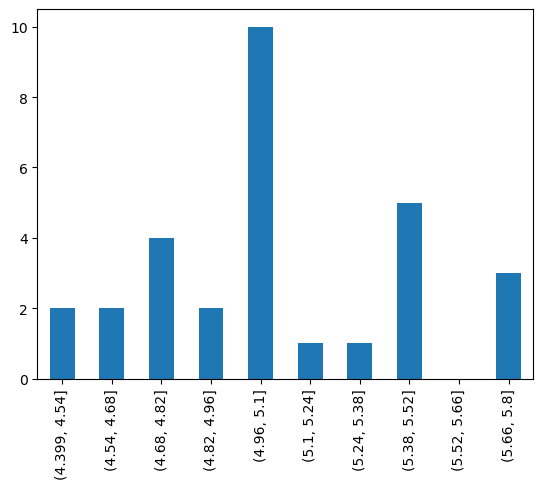

(2.298, 2.51]     1
(2.51, 2.72]      0
(2.72, 2.93]      1
(2.93, 3.14]      5
(3.14, 3.35]      3
(3.35, 3.56]     10
(3.56, 3.77]      2
(3.77, 3.98]      5
(3.98, 4.19]      2
(4.19, 4.4]       1
Name: sepal_width, dtype: int64


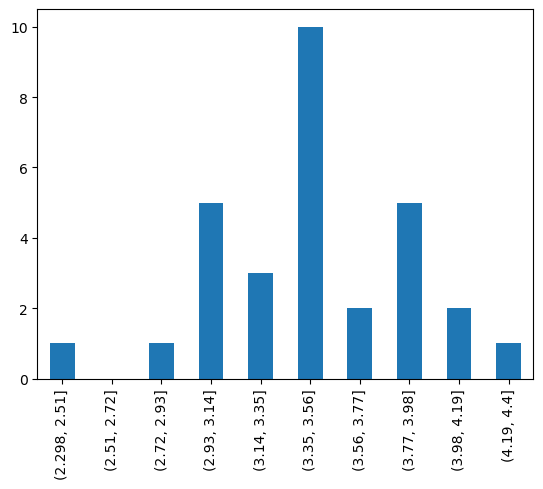

(1.199, 1.27]    2
(1.27, 1.34]     4
(1.34, 1.41]     5
(1.41, 1.48]     0
(1.48, 1.55]     7
(1.55, 1.62]     6
(1.62, 1.69]     0
(1.69, 1.76]     4
(1.76, 1.83]     0
(1.83, 1.9]      2
Name: petal_length, dtype: int64


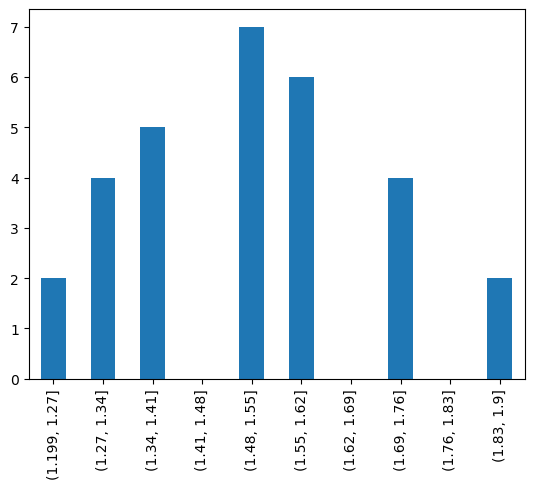

(0.0995, 0.15]     3
(0.15, 0.2]       15
(0.2, 0.25]        0
(0.25, 0.3]        4
(0.3, 0.35]        0
(0.35, 0.4]        6
(0.4, 0.45]        0
(0.45, 0.5]        1
(0.5, 0.55]        0
(0.55, 0.6]        1
Name: petal_width, dtype: int64


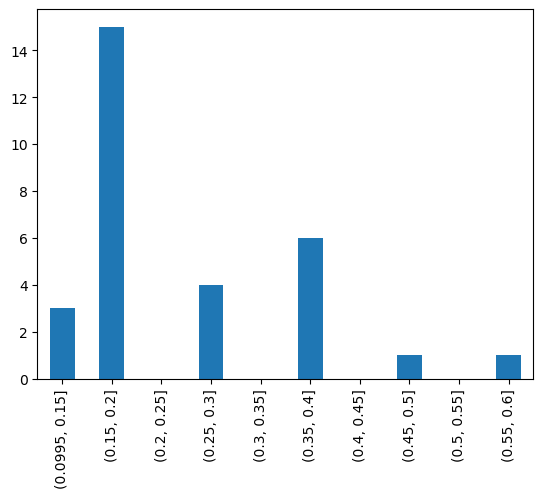

(4.897, 5.2]    1
(5.2, 5.5]      0
(5.5, 5.8]      2
(5.8, 6.1]      3
(6.1, 6.4]      7
(6.4, 6.7]      5
(6.7, 7.0]      5
(7.0, 7.3]      3
(7.3, 7.6]      1
(7.6, 7.9]      2
Name: sepal_length, dtype: int64


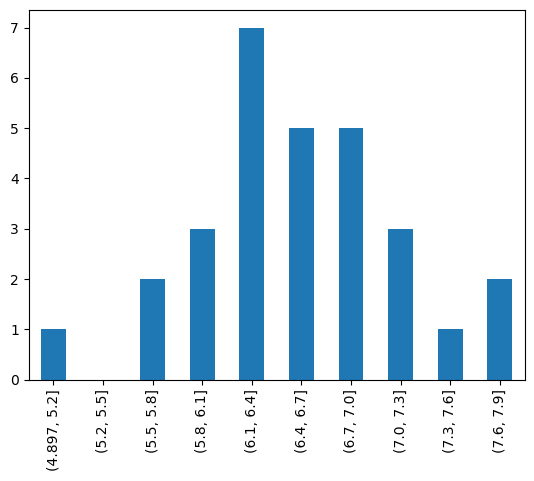

(2.198, 2.36]    1
(2.36, 2.52]     4
(2.52, 2.68]     2
(2.68, 2.84]     5
(2.84, 3.0]      6
(3.0, 3.16]      4
(3.16, 3.32]     5
(3.32, 3.48]     0
(3.48, 3.64]     1
(3.64, 3.8]      1
Name: sepal_width, dtype: int64


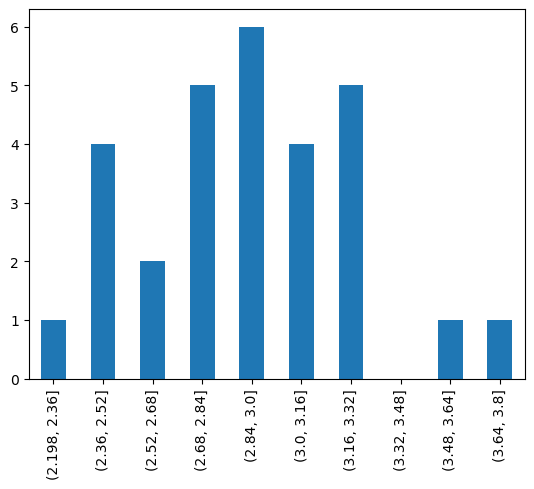

(4.498, 4.74]    1
(4.74, 4.98]     2
(4.98, 5.22]     6
(5.22, 5.46]     2
(5.46, 5.7]      8
(5.7, 5.94]      3
(5.94, 6.18]     4
(6.18, 6.42]     2
(6.42, 6.66]     0
(6.66, 6.9]      1
Name: petal_length, dtype: int64


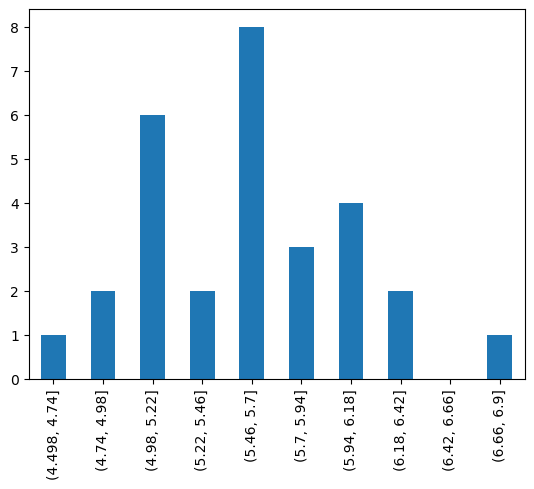

(1.399, 1.51]    2
(1.51, 1.62]     0
(1.62, 1.73]     1
(1.73, 1.84]     7
(1.84, 1.95]     3
(1.95, 2.06]     4
(2.06, 2.17]     2
(2.17, 2.28]     2
(2.28, 2.39]     4
(2.39, 2.5]      4
Name: petal_width, dtype: int64


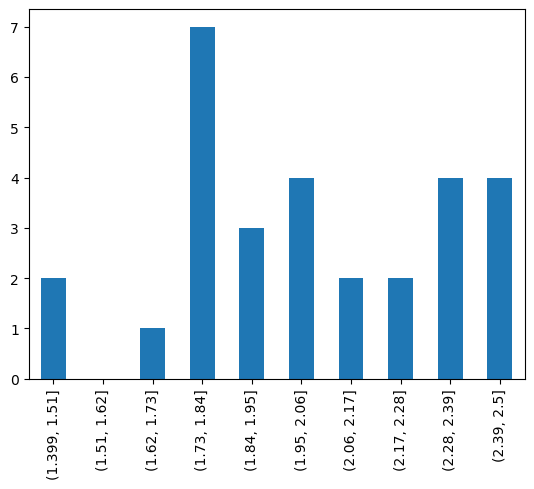

(4.898, 5.11]    1
(5.11, 5.32]     1
(5.32, 5.53]     4
(5.53, 5.74]     7
(5.74, 5.95]     5
(5.95, 6.16]     4
(6.16, 6.37]     2
(6.37, 6.58]     3
(6.58, 6.79]     1
(6.79, 7.0]      2
Name: sepal_length, dtype: int64


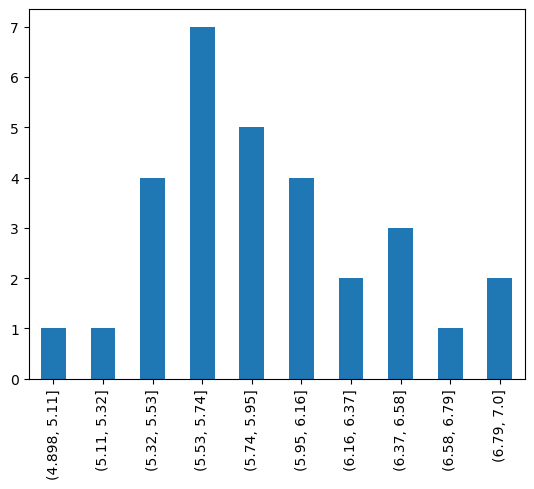

(2.299, 2.41]    4
(2.41, 2.52]     2
(2.52, 2.63]     2
(2.63, 2.74]     5
(2.74, 2.85]     3
(2.85, 2.96]     4
(2.96, 3.07]     5
(3.07, 3.18]     1
(3.18, 3.29]     3
(3.29, 3.4]      1
Name: sepal_width, dtype: int64


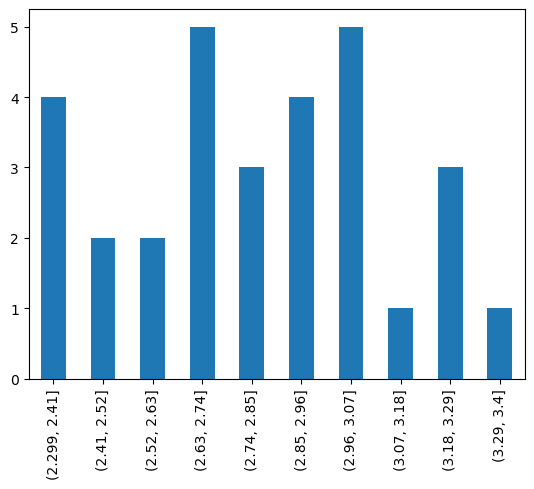

(3.298, 3.48]    1
(3.48, 3.66]     1
(3.66, 3.84]     1
(3.84, 4.02]     6
(4.02, 4.2]      2
(4.2, 4.38]      6
(4.38, 4.56]     5
(4.56, 4.74]     5
(4.74, 4.92]     2
(4.92, 5.1]      1
Name: petal_length, dtype: int64


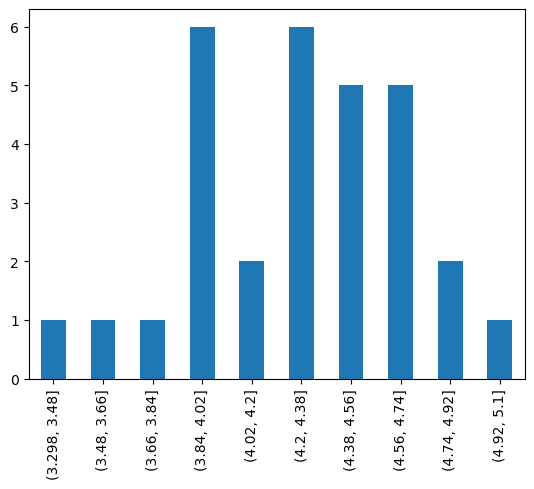

(0.999, 1.08]     4
(1.08, 1.16]      1
(1.16, 1.24]      4
(1.24, 1.32]     10
(1.32, 1.4]       3
(1.4, 1.48]       0
(1.48, 1.56]      5
(1.56, 1.64]      2
(1.64, 1.72]      0
(1.72, 1.8]       1
Name: petal_width, dtype: int64


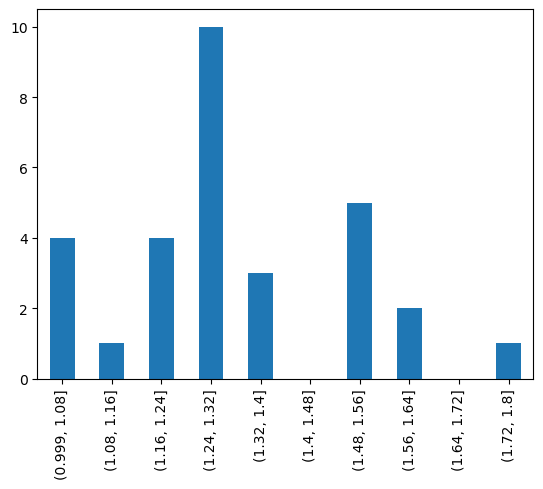

In [32]:
setosa = train[train.species_name == 'setosa']
virginica = train[train.species_name == 'virginica']
versicolor = train[train.species_name == 'versicolor']

for col in train.select_dtypes(include=['float', 'int']):
    setosa = pd.DataFrame(setosa)
    setosa_freq = pd.cut(setosa[col], 10)
    print(setosa_freq.value_counts(sort=False))
    setosa_freq.value_counts(sort=False).plot.bar()
    plt.show()

for col in train.select_dtypes(include=['float', 'int']):
    virginica = pd.DataFrame(virginica)
    virginica_freq = pd.cut(virginica[col], 10)
    print(virginica_freq.value_counts(sort=False))
    virginica_freq.value_counts(sort=False).plot.bar()
    plt.show()

for col in train.select_dtypes(include=['float', 'int']):
    versicolor = pd.DataFrame(versicolor)
    versicolor_freq = pd.cut(versicolor[col], 10)
    print(versicolor_freq.value_counts(sort=False))
    versicolor_freq.value_counts(sort=False).plot.bar()
    plt.show()

In [61]:
setosa.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
36,setosa,5.5,3.5,1.3,0.2,0,0
18,setosa,5.7,3.8,1.7,0.3,0,0
31,setosa,5.4,3.4,1.5,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
15,setosa,5.7,4.4,1.5,0.4,0,0


(4.399, 4.54]     2
(4.54, 4.68]      2
(4.68, 4.82]      4
(4.82, 4.96]      2
(4.96, 5.1]      10
(5.1, 5.24]       1
(5.24, 5.38]      1
(5.38, 5.52]      5
(5.52, 5.66]      0
(5.66, 5.8]       3
Name: sepal_length, dtype: int64


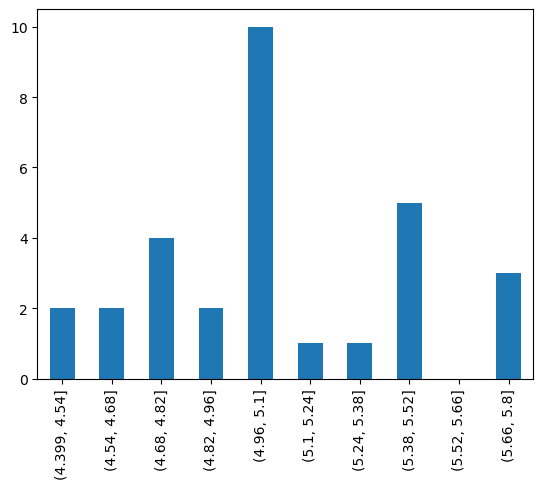

(2.298, 2.51]     1
(2.51, 2.72]      0
(2.72, 2.93]      1
(2.93, 3.14]      5
(3.14, 3.35]      3
(3.35, 3.56]     10
(3.56, 3.77]      2
(3.77, 3.98]      5
(3.98, 4.19]      2
(4.19, 4.4]       1
Name: sepal_width, dtype: int64


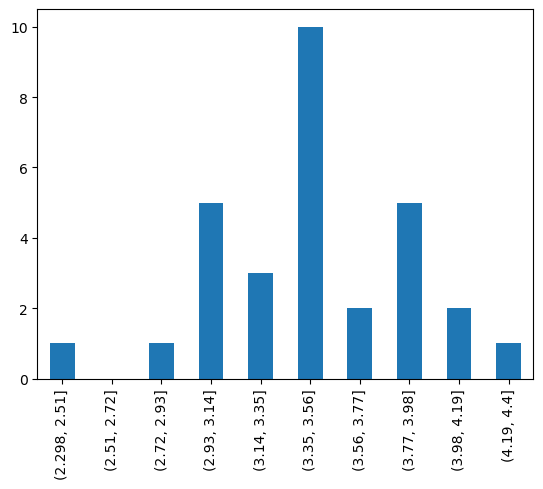

(1.199, 1.27]    2
(1.27, 1.34]     4
(1.34, 1.41]     5
(1.41, 1.48]     0
(1.48, 1.55]     7
(1.55, 1.62]     6
(1.62, 1.69]     0
(1.69, 1.76]     4
(1.76, 1.83]     0
(1.83, 1.9]      2
Name: petal_length, dtype: int64


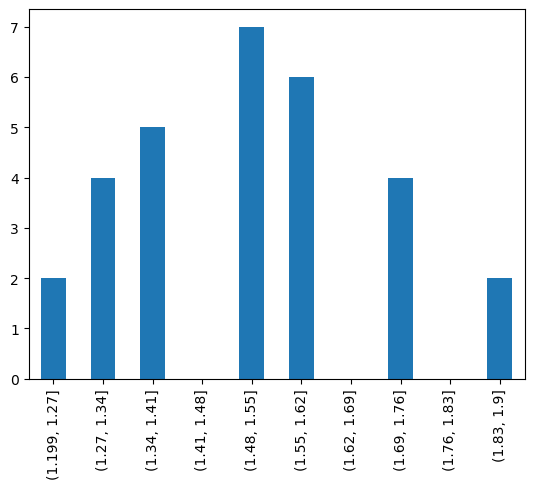

(0.0995, 0.15]     3
(0.15, 0.2]       15
(0.2, 0.25]        0
(0.25, 0.3]        4
(0.3, 0.35]        0
(0.35, 0.4]        6
(0.4, 0.45]        0
(0.45, 0.5]        1
(0.5, 0.55]        0
(0.55, 0.6]        1
Name: petal_width, dtype: int64


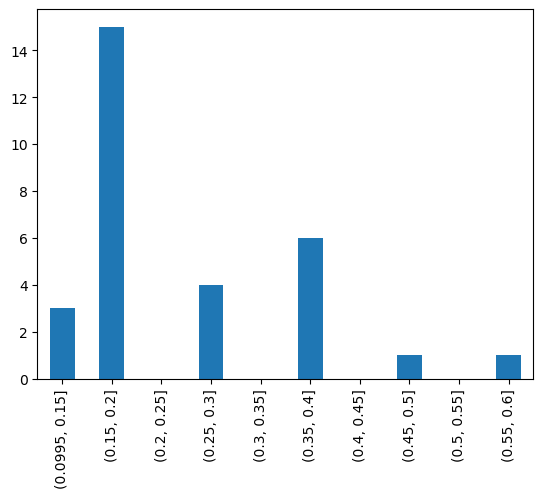

In [74]:

for col in train.select_dtypes(include=['float', 'int']):
    setosa = pd.DataFrame(setosa)
    setosa_freq = pd.cut(setosa[col], 10)
    print(setosa_freq.value_counts(sort=False))
    setosa_freq.value_counts(sort=False).plot.bar()
    plt.show()

(4.897, 5.2]    1
(5.2, 5.5]      0
(5.5, 5.8]      2
(5.8, 6.1]      3
(6.1, 6.4]      7
(6.4, 6.7]      5
(6.7, 7.0]      5
(7.0, 7.3]      3
(7.3, 7.6]      1
(7.6, 7.9]      2
Name: sepal_length, dtype: int64


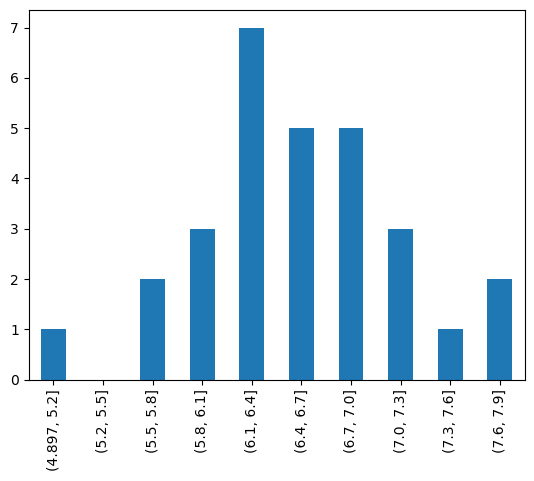

(2.198, 2.36]    1
(2.36, 2.52]     4
(2.52, 2.68]     2
(2.68, 2.84]     5
(2.84, 3.0]      6
(3.0, 3.16]      4
(3.16, 3.32]     5
(3.32, 3.48]     0
(3.48, 3.64]     1
(3.64, 3.8]      1
Name: sepal_width, dtype: int64


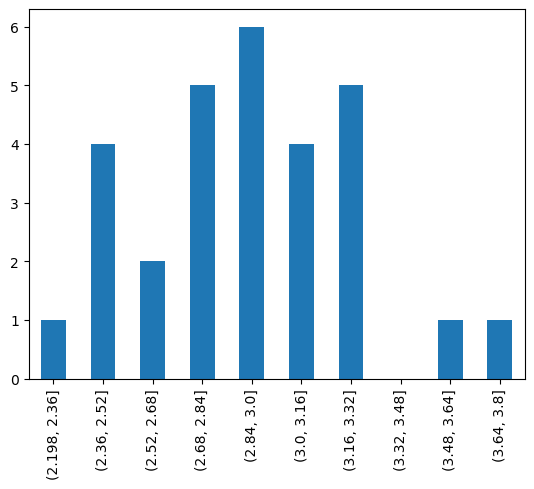

(4.498, 4.74]    1
(4.74, 4.98]     2
(4.98, 5.22]     6
(5.22, 5.46]     2
(5.46, 5.7]      8
(5.7, 5.94]      3
(5.94, 6.18]     4
(6.18, 6.42]     2
(6.42, 6.66]     0
(6.66, 6.9]      1
Name: petal_length, dtype: int64


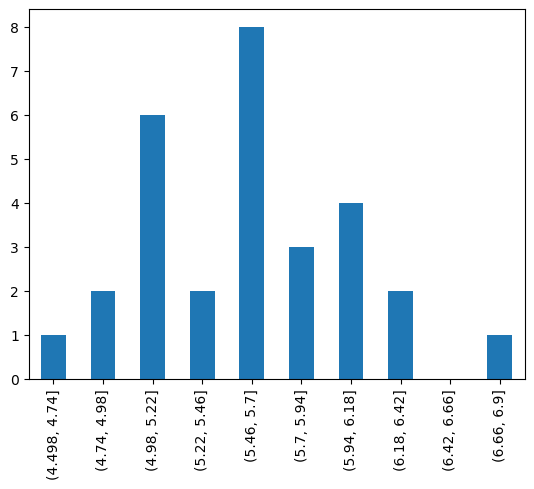

(1.399, 1.51]    2
(1.51, 1.62]     0
(1.62, 1.73]     1
(1.73, 1.84]     7
(1.84, 1.95]     3
(1.95, 2.06]     4
(2.06, 2.17]     2
(2.17, 2.28]     2
(2.28, 2.39]     4
(2.39, 2.5]      4
Name: petal_width, dtype: int64


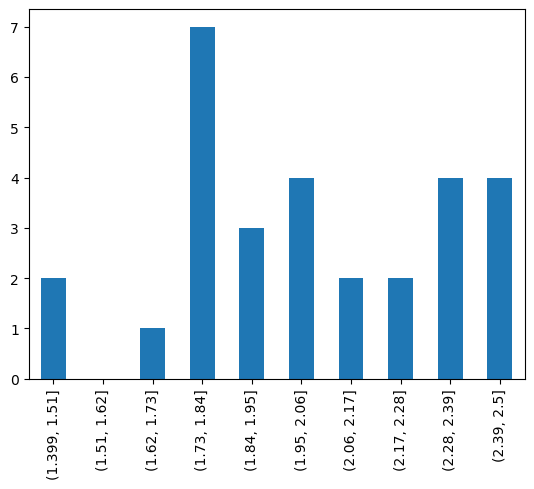

In [75]:
for col in train.select_dtypes(include=['float', 'int']):
    virginica = pd.DataFrame(virginica)
    virginica_freq = pd.cut(virginica[col], 10)
    print(virginica_freq.value_counts(sort=False))
    virginica_freq.value_counts(sort=False).plot.bar()
    plt.show()

(4.898, 5.11]    1
(5.11, 5.32]     1
(5.32, 5.53]     4
(5.53, 5.74]     7
(5.74, 5.95]     5
(5.95, 6.16]     4
(6.16, 6.37]     2
(6.37, 6.58]     3
(6.58, 6.79]     1
(6.79, 7.0]      2
Name: sepal_length, dtype: int64


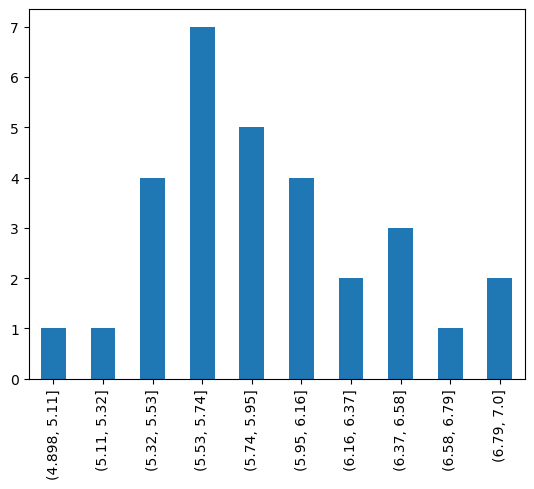

(2.299, 2.41]    4
(2.41, 2.52]     2
(2.52, 2.63]     2
(2.63, 2.74]     5
(2.74, 2.85]     3
(2.85, 2.96]     4
(2.96, 3.07]     5
(3.07, 3.18]     1
(3.18, 3.29]     3
(3.29, 3.4]      1
Name: sepal_width, dtype: int64


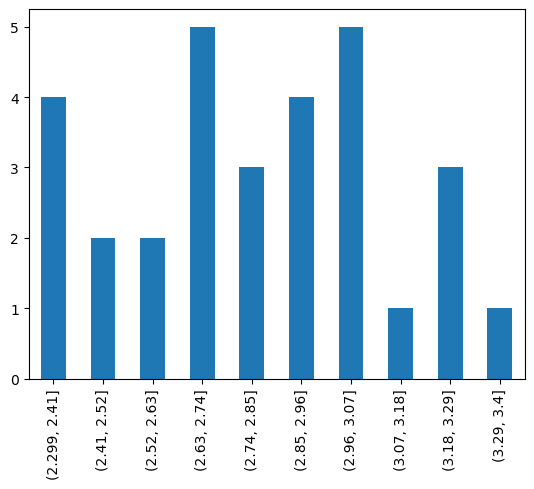

(3.298, 3.48]    1
(3.48, 3.66]     1
(3.66, 3.84]     1
(3.84, 4.02]     6
(4.02, 4.2]      2
(4.2, 4.38]      6
(4.38, 4.56]     5
(4.56, 4.74]     5
(4.74, 4.92]     2
(4.92, 5.1]      1
Name: petal_length, dtype: int64


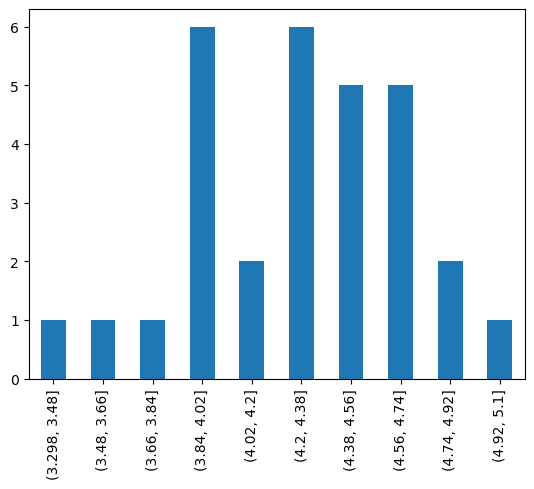

(0.999, 1.08]     4
(1.08, 1.16]      1
(1.16, 1.24]      4
(1.24, 1.32]     10
(1.32, 1.4]       3
(1.4, 1.48]       0
(1.48, 1.56]      5
(1.56, 1.64]      2
(1.64, 1.72]      0
(1.72, 1.8]       1
Name: petal_width, dtype: int64


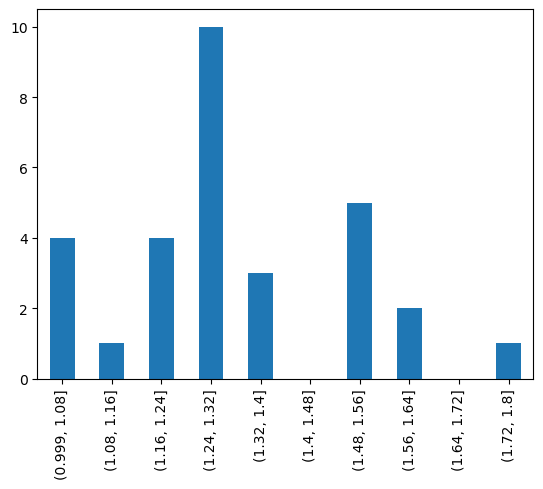

In [76]:
for col in train.select_dtypes(include=['float', 'int']):
    versicolor = pd.DataFrame(versicolor)
    versicolor_freq = pd.cut(versicolor[col], 10)
    print(versicolor_freq.value_counts(sort=False))
    versicolor_freq.value_counts(sort=False).plot.bar()
    plt.show()

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [ ]:
y axis: sepal_length,
x axis: mean sepal lengths of setosa, and versicolor, and virginica

create a mean for each species lengths
create 4 different barplot charts

In [97]:
set_bar_sep_l = setosa.sepal_length.mean()
set_bar_sep_w = setosa.sepal_width.mean()
set_bar_pet_l = setosa.petal_length.mean()
set_bar_pet_w = setosa.petal_width.mean()

ver_bar_sep_l = versicolor.sepal_length.mean()
ver_bar_sep_w = versicolor.sepal_width.mean()
ver_bar_pet_l = versicolor.petal_length.mean()
ver_bar_pet_w = versicolor.petal_width.mean()

vir_bar_sep_l = virginica.sepal_length.mean()
vir_bar_sep_w = virginica.sepal_width.mean()
vir_bar_pet_l = virginica.petal_length.mean()
vir_bar_pet_w = virginica.petal_width.mean()

In [129]:
x = ['setosa', 'versicolor', 'virginica']
sepal_lengths = [set_bar_sep_l, ver_bar_sep_l, vir_bar_sep_l]
sepal_widths = [set_bar_sep_w, ver_bar_sep_w, vir_bar_sep_w]
petal_lengths = [set_bar_pet_l, ver_bar_pet_l, vir_bar_pet_l]
petal_widths = [set_bar_pet_w, ver_bar_pet_w, vir_bar_pet_w]

overall_avg_sep_l = sum(sepal_lengths)/len(sepal_lengths)
overall_avg_sep_w = sum(sepal_widths)/len(sepal_widths)
overall_avg_pet_l = sum(petal_lengths)/len(petal_lengths)
overall_avg_pet_w = sum(petal_widths)/len(petal_widths)

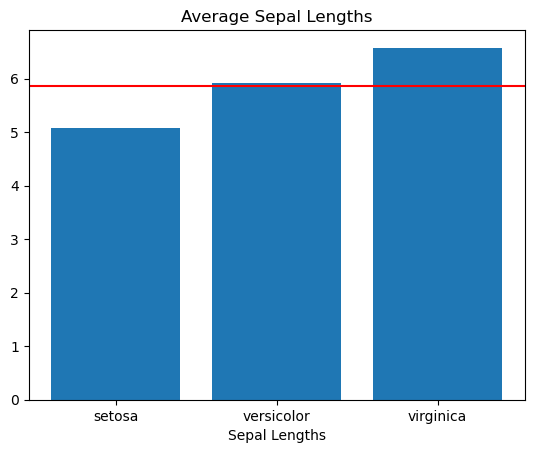

In [130]:
sepal_lengths = [set_bar_sep_l, ver_bar_sep_l, vir_bar_sep_l]
plt.bar(x, sepal_lengths)
overall_avg_sep_l = sum(sepal_lengths)/len(sepal_lengths)
plt.axhline(y = overall_avg_sep_l, color='r', linestyle='-')
plt.title('Average Sepal Lengths')
plt.xlabel('Sepal Lengths')
plt.show()

In [ ]:
y axis: sepal_width
x axis: species name mean sepal width of setosa, and versicolor, and virginica

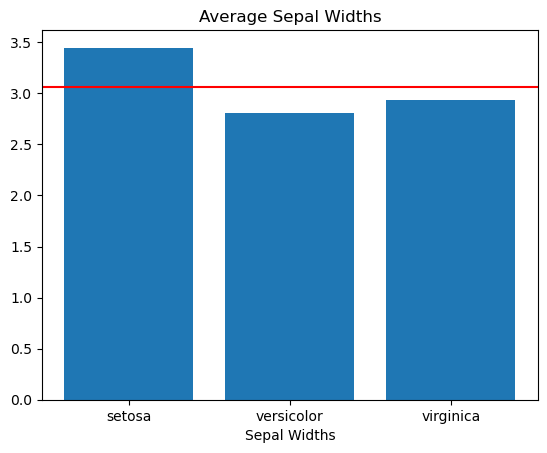

In [139]:
plt.bar(x, sepal_widths)
overall_avg_sep_w = sum(sepal_widths)/len(sepal_widths)
plt.axhline(y = overall_avg_sep_w, color='r', linestyle='-')
plt.title('Average Sepal Widths')
plt.xlabel('Sepal Widths')
plt.show()

In [ ]:
y axis: petal_length
x axis: mean petal length of setosa, and versicolor, and virginica

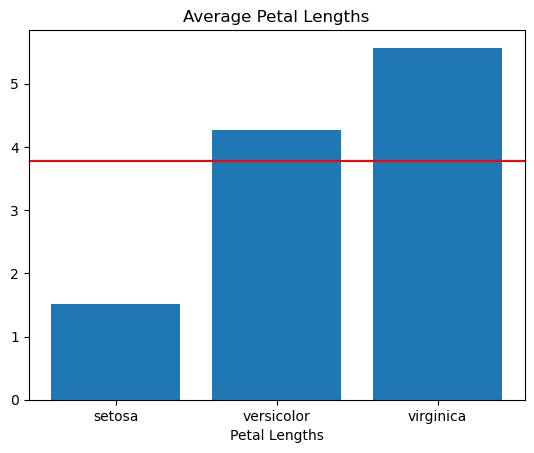

In [138]:
plt.bar(x, petal_lengths)
overall_avg_pet_l = sum(petal_lengths)/len(petal_lengths)
plt.axhline(y = overall_avg_pet_l, color='r', linestyle='-')
plt.title('Average Petal Lengths')
plt.xlabel('Petal Lengths')
plt.show()

In [ ]:
y axis: petal width
x axis: species and bar of petal width of setosa, versicolor, virginica

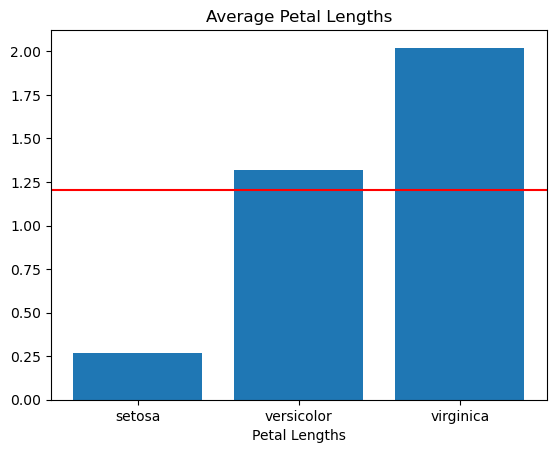

In [136]:
plt.bar(x, petal_widths)
overall_avg_sep_l = sum(petal_lengths)/len(petal_lengths)
plt.axhline(y = overall_avg_pet_w, color='r', linestyle='-')
plt.title('Average Petal Lengths')
plt.xlabel('Petal Lengths')
plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [51]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.070000,3.446667,1.510000,0.266667,0.0,0.0
std,0.356371,0.420782,0.178789,0.121296,0.0,0.0
min,4.400000,2.300000,1.200000,0.100000,0.0,0.0
25%,4.825000,3.200000,1.400000,0.200000,0.0,0.0
50%,5.000000,3.400000,1.500000,0.200000,0.0,0.0
75%,5.375000,3.775000,1.600000,0.375000,0.0,0.0
max,5.800000,4.400000,1.900000,0.600000,0.0,0.0


In [50]:
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
count,30.00000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.91000,2.806667,4.273333,1.320000,1.0,0.0
std,0.47659,0.281539,0.409317,0.193694,0.0,0.0
min,4.90000,2.300000,3.300000,1.000000,1.0,0.0
25%,5.60000,2.625000,4.000000,1.200000,1.0,0.0
50%,5.80000,2.800000,4.250000,1.300000,1.0,0.0
75%,6.17500,3.000000,4.575000,1.475000,1.0,0.0
max,7.00000,3.400000,5.100000,1.800000,1.0,0.0


In [52]:
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
count,29.000000,29.000000,29.000000,29.000000,29.0,29.0
mean,6.575862,2.931034,5.568966,2.020690,0.0,1.0
std,0.638444,0.352647,0.530568,0.290786,0.0,0.0
min,4.900000,2.200000,4.500000,1.400000,0.0,1.0
25%,6.300000,2.700000,5.100000,1.800000,0.0,1.0
50%,6.500000,3.000000,5.600000,2.000000,0.0,1.0
75%,6.900000,3.100000,5.900000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



In [35]:
# Name of the columns
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
alpha = 0.05
#virginica = train [train.species == 'virginica']
#versicolor = train [train.species == 'versicolor']
for i in columns:
    t, p = stats.mannwhitneyu(virginica[i], versicolor[i])
    print(f'Mann-Whitney test result for {i} comparing Versicolor vs Virginica:')
    print(f'p-value = {p:.10f}')
    if p < alpha:
        print('The difference in mean values is statistically significant at the', alpha*100, '% significance level.')
        print('We reject the null hypothesis')
    else:
        print('There is no statistically significant difference in mean values at the', alpha*100, '% significance level.')
        print('We fail to reject the null hypothesis')
    print('\n')

Mann-Whitney test result for sepal_length comparing Versicolor vs Virginica:
p-value = 0.0000470107
The difference in mean values is statistically significant at the 5.0 % significance level.
We reject the null hypothesis


Mann-Whitney test result for sepal_width comparing Versicolor vs Virginica:
p-value = 0.1631822310
There is no statistically significant difference in mean values at the 5.0 % significance level.
We fail to reject the null hypothesis


Mann-Whitney test result for petal_length comparing Versicolor vs Virginica:
p-value = 0.0000000002
The difference in mean values is statistically significant at the 5.0 % significance level.
We reject the null hypothesis


Mann-Whitney test result for petal_width comparing Versicolor vs Virginica:
p-value = 0.0000000003
The difference in mean values is statistically significant at the 5.0 % significance level.
We reject the null hypothesis




## Multivariate Stats

## Part III    
    
    Explore your telco data to discover drivers of churn

    Determine if certain columns should be dropped

    Determine if it would be valuable to bin some numeric columns

    Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.



In [54]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


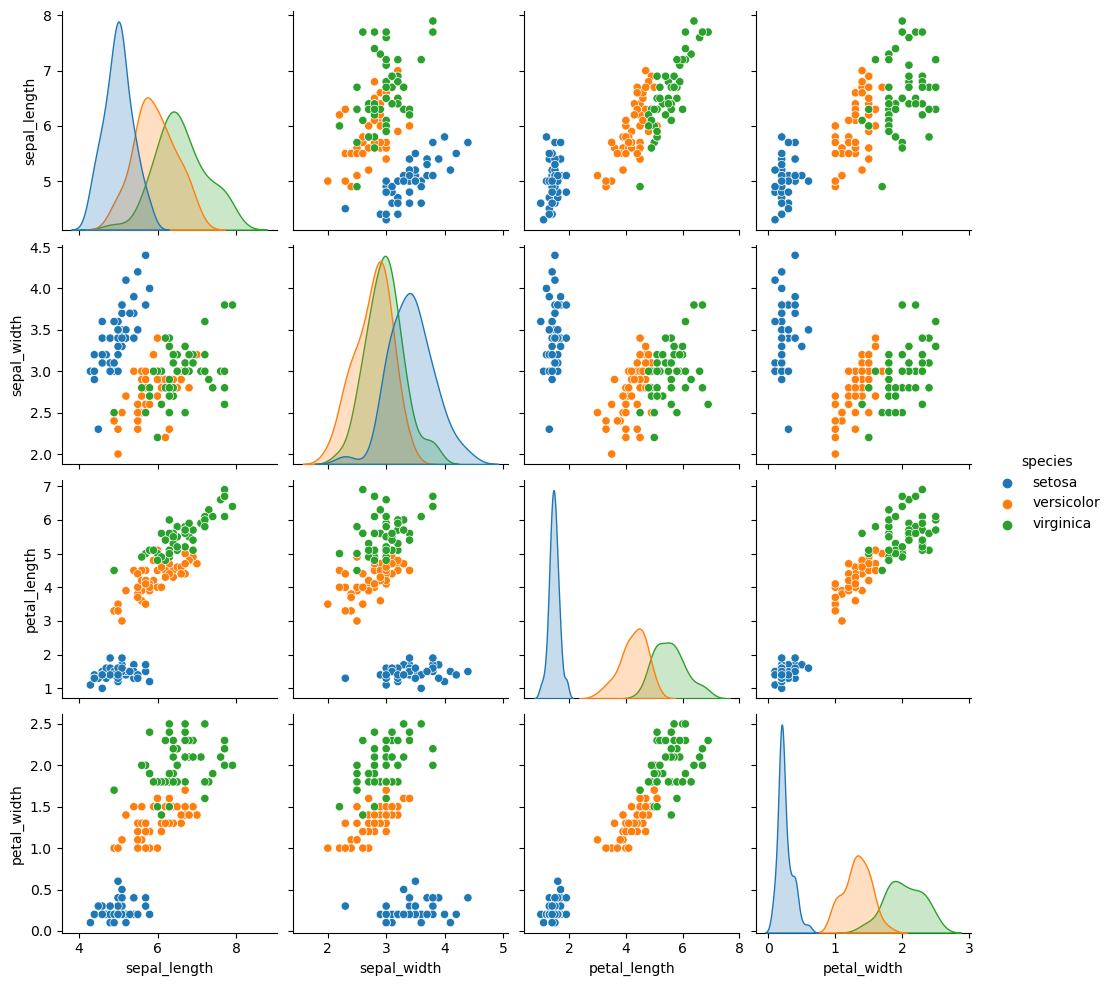

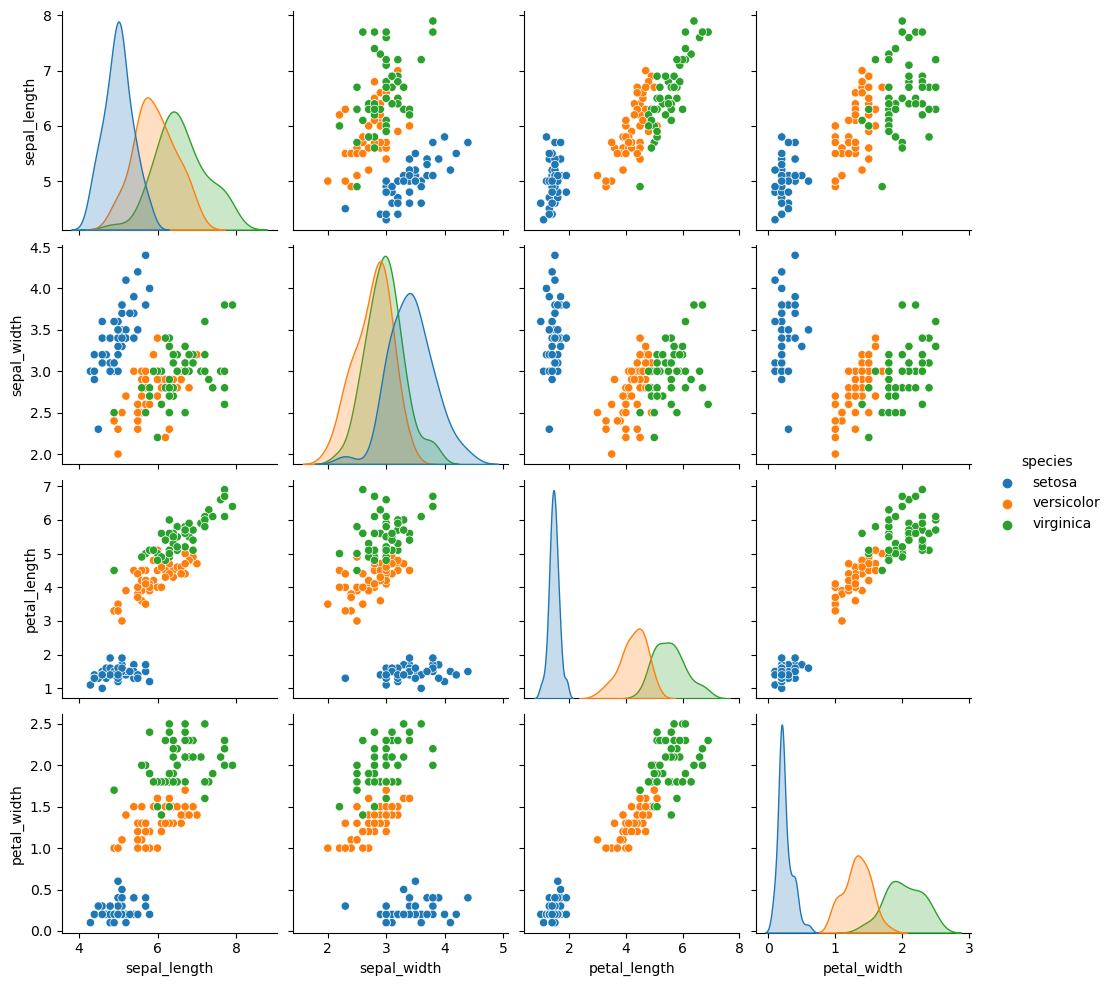

In [57]:
sns.pairplot(data=iris, hue='species')
plt.show()

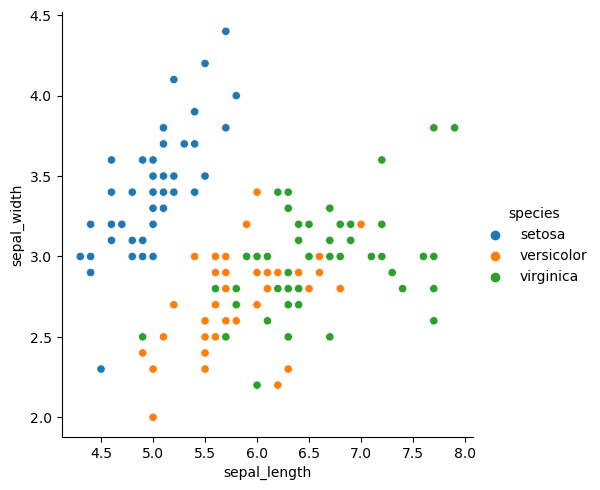

In [55]:
sns.relplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

Explore your telco data to discover drivers of churn

In [58]:
df_telco = acq.get_telco_data(acq.telco_query, acq.directory)
cols_to_drop = ['internet_service_type_id', 'contract_type_id', 'payment_type_id']
df_telco = df_telco.drop(columns=cols_to_drop)
df_telco.shape

(7043, 21)

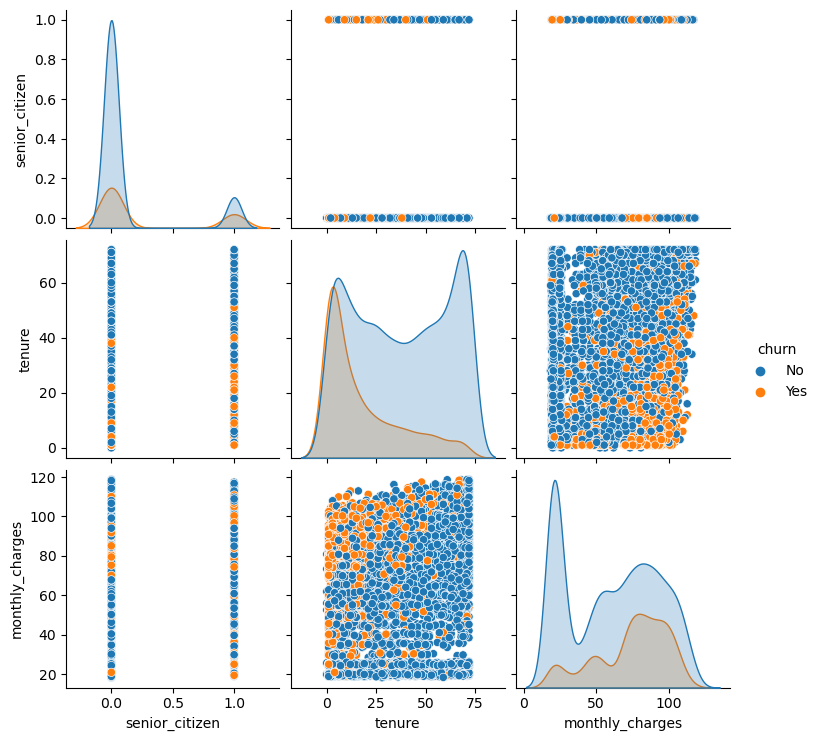

In [59]:
sns.pairplot(data=df_telco, hue = 'churn')
plt.show()

The longer a customer has had the service the less likely they were to churn, regardless of monthly rate. A significant amount of churns happeining before 25 months.